In [508]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
from scipy.special import wofz

In [509]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

#Actividad 1
Data1A1 = Data(r'C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos de actividad 1 3 a 55 grados')

#Actividad 2 calibración
Data1A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF sin material 6 a 16 grados")

#Actividad 2 Al
Data2A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al002 6 a 16 grados")
Data3A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF Al004 6 a 16 grados")
Data4A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al006 6 a 16 grados")
Data5A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al008 6 a 16 grados")

#Actividad 2 Zn
Data6A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0025 6 a 16 grados")
Data7A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 005 6 a 16 grados")
Data8A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0075 6 a 16 grados")
Data9A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 001 6 a 16 grados")

#Actividad 3
Data1A3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 3 I 01 constante V 35kV 17 a 27 grados")
Data2A3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 3 V constante I 01 16 a 27 grados")

#Actividad 4
Data1A4 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 4 I constante y lente 2mm")


**Actividad 1: Rayos x característicos del cobre.**

In [510]:
#Parámetros y funciones globales
dZn = 2.014 #x10^(-10) m 
dKBr = 3.290 #x10^(-10) m

#Ajuste Lorentziano: h peak height, x0 peak position, W peak width peak_widths
def Lorentzian(x,h,x0,W):
    return h*W**2/((x-x0)**2+W**2)

#Ajuste Gaussiano
def Gauss(x, y0, a, x0, sigma):
    return y0 + a * np.exp(-(x - x0)**2 / (2 * sigma**2))

#Ajuste de Voight: X x-values, sigma Gaussian standard deviation, gamma Lorentzian full-width at half-maximum
def Voigt(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    v = amplitude * wofz(z).real / (sigma * np.sqrt(2 * np.pi))
    return v

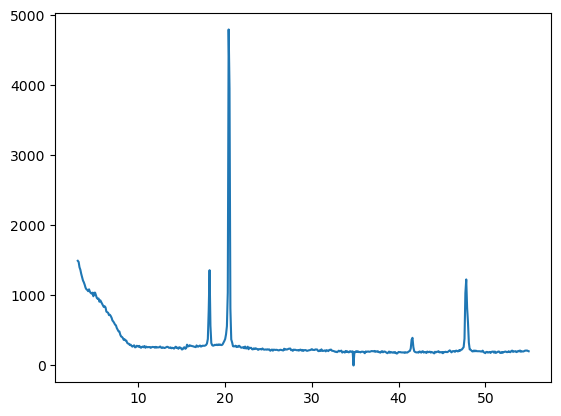

In [511]:
#Grafica general para visualizar los datos
plt.plot(Data1A1['Ang'],Data1A1['In'])
x = Data1A1['Ang']

In [512]:
#Calculos para primer orden

#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x = []
y = []
xa = []
ya = []
xaa = []
yaa = []
xb = []
yb = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=15.0 and Data1A1['Ang'][i]<22.0: 
        #Se le aplica el factor de calibracion de 2.1 grados a los datos de angulo
        x.append(2*dZn*(np.sin(np.radians(Data1A1['Ang'][i])))/1)
        y.append(Data1A1['In'][i])

for i in range(0,len(x)):
    if x[i]>=1.23 and x[i]<1.35: 
            xb.append(x[i])
            yb.append(y[i])
    if x[i]>=1.28 and x[i]<1.43: 
            xa.append(x[i])
            ya.append(y[i])
    if x[i]>=1.40 and x[i]<1.5: 
            xaa.append(x[i])
            yaa.append(y[i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt1, pcov1 = curve_fit(Lorentzian,xdata=xb, ydata=yb)
popt11, pcov11 = curve_fit(Lorentzian,xdata=xa, ydata=ya)
popt111, pcov111 = curve_fit(Lorentzian,xdata=xaa, ydata=yaa)

ha = popt11[0]
x0a = popt11[1]
Wa = popt11[2]
errora = np.sqrt(np.diag(pcov11)) #Desviación estándar dada por el ajuste

hb = popt1[0]
x0b = popt1[1]
Wb = popt1[2]
errorb = np.sqrt(np.diag(pcov1)) #Desviación estándar dada por el ajuste

haa = popt111[0]
x0aa = popt111[1]
Waa = popt111[2]
erroraa = np.sqrt(np.diag(pcov111)) #Desviación estándar dada por el ajuste

x1_ = np.linspace(min(x),max(x),500)

#Perfil de Voight
poptgb, pcovgb = curve_fit(Gauss,xdata=xb,ydata=yb)
sigmab = poptgb[3]
poptb, pcovb = curve_fit(Voigt,xdata=xb, ydata=yb,p0=(4500, x0b, sigmab, Wb) )
amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb = poptb
errorvb = np.sqrt(np.diag(pcovb))

poptga, pcovga = curve_fit(Gauss,xdata=xa,ydata=ya)
sigmaa = poptga[3]
popta, pcova = curve_fit(Voigt,xdata=xa, ydata=ya,p0=(4500, x0a, sigmaa, Wa) )
amplitude_fita, center_fita, sigma_fita, gamma_fita = popta
errorva = np.sqrt(np.diag(pcova))

poptgaa, pcovgaa = curve_fit(Gauss,xdata=xa,ydata=ya)
sigmaa = poptgaa[3]
poptaa, pcovaa = curve_fit(Voigt,xdata=xa, ydata=ya,p0=(4500, x0a, sigmaa, Wa) )
amplitude_fitaa, center_fitaa, sigma_fitaa, gamma_fitaa = poptaa
errorvaa = np.sqrt(np.diag(pcovaa))

#Cálculo de energías y longitudes de onda.
print('Ajuste Lorentziano')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(x0a,2),round(x0b,2),round(errora[1],4),round(errorb[1],3)))
print('Perfil de Voigt')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(center_fita,2),round(center_fitb,2),round(errorva[1],4),round(errorvb[1],3)))
Ea = 12.40 / (x0a*10) #Esto para que quede nm KV/nm
Eb = 12.40 / (x0b*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea,2),round(Eb,2)))

#Cálculo de residuales para primer orden
rL = []
rV = []
for i in range(0,len(y)):
      rL.append(-y[i]+(Lorentzian(x[i],hb,x0b,Wb)+Lorentzian(x[i],ha,x0a,Wa)))
      rV.append(-y[i]+(Voigt(x[i],amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb)+Voigt(x[i],amplitude_fita, center_fita, sigma_fita, gamma_fita)))


Ajuste Lorentziano
La longitud de onda de K alfa es 1.41 y de K beta es 1.26 Armstrong; sus incertidumbres son 0.0002 y 0.002 respectivamente
Perfil de Voigt
La longitud de onda de K alfa es 1.41 y de K beta es 1.26 Armstrong; sus incertidumbres son 0.0005 y 0.003 respectivamente
Las energías para alfa y beta serán 0.88 y 0.99 Kv


In [513]:
#Calculos para segundo orden

#Cambiar de ángulo a longitud de onda utilizando la ley de Bragg 
#Para mejor calidad se tomó solo los ángulos donde se sabe que aparecen los picos
x2 = []
y2 = []
xa2 = []
ya2 = []
xb2 = []
yb2 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=40.0 and Data1A1['Ang'][i]<50.0: 
        #Se le aplica el factor de calibracion de 2.1 grados a los datos de angulo
        x2.append(2*dZn*(np.sin(np.radians(Data1A1['Ang'][i]-2.1)))/2)
        y2.append(Data1A1['In'][i])

for i in range(0,len(x2)):
    if x2[i]>=1.25 and x2[i]<1.35: 
            xb2.append(x2[i])
            yb2.append(y2[i])

    if x2[i]>=1.40 and x2[i]<1.50: 
            xa2.append(x2[i])
            ya2.append(y2[i])

#Ajuste Lorentziano, como los datos no son del todo continuos, el ancho de la curva a la mitad de la altura se realizó estimando.
popt12, pcov12 = curve_fit(Lorentzian,xdata=xb2, ydata=yb2)
popt112, pcov112 = curve_fit(Lorentzian,xdata=xa2, ydata=ya2)

ha2 = popt112[0]
x0a2 = popt112[1]
Wa2 = popt112[2]
errora2 = np.sqrt(np.diag(pcov112)) #Desviación estándar dada por el ajuste

hb2 = popt12[0]
x0b2 = popt12[1]
Wb2 = popt12[2]
errorb2 = np.sqrt(np.diag(pcov12)) #Desviación estándar dada por el ajuste

x1_2 = np.linspace(min(x2),max(x2),500)

#Perfil de Voight
poptgb2, pcovgb2 = curve_fit(Gauss,xdata=xb2,ydata=yb2)
sigmab2 = poptgb2[3]
poptb2, pcovb2 = curve_fit(Voigt,xdata=xb2, ydata=yb2)
amplitude_fitb2, center_fitb2, sigma_fitb2, gamma_fitb2 = poptb2
errorvb2 = np.sqrt(np.diag(pcovb2))

poptga2, pcovga2 = curve_fit(Gauss,xdata=xa2,ydata=ya2)
sigmaa2 = poptgb2[3]
popta2, pcova2 = curve_fit(Voigt,xdata=xa2, ydata=ya2 )
amplitude_fita2, center_fita2, sigma_fita2, gamma_fita2 = popta2
errorva2 = np.sqrt(np.diag(pcova2))


#Cálculo de energías y longitudes de onda.
print('Ajuste Lorentziano')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(x0a2,2),round(x0b2,2),round(errora2[1],4),round(errorb2[1],3)))
print('Perfil de Voigt')
print('La longitud de onda de K alfa es {} y de K beta es {} Armstrong; sus incertidumbres son {} y {} respectivamente'.format(round(center_fita2,2),round(center_fitb2,2),round(errorva2[1],4),round(errorvb2[1],3)))
Ea2 = 12.40 / (x0a2*10) #Esto para que quede nm KV/nm
Eb2 = 12.40 / (x0b2*10) #Esto para que quede nm KV/nm
print('Las energías para alfa y beta serán {} y {} Kv'.format(round(Ea2,2),round(Eb2,2)))

#Cálculo de residuales para segundo orden
rL2 = []
rV2 = []
for i in range(0,len(y2)):
      rL2.append(-y2[i]+(Lorentzian(x2[i],hb2,x0b2,Wb2)+Lorentzian(x2[i],ha2,x0a2,Wa2)))
      rV2.append(-y2[i]+(Voigt(x2[i],amplitude_fitb2, center_fitb2, sigma_fitb2, gamma_fitb2)+Voigt(x2[i],amplitude_fita2, center_fita2, sigma_fita2, gamma_fita2)))

Ajuste Lorentziano
La longitud de onda de K alfa es 1.44 y de K beta es 1.29 Armstrong; sus incertidumbres son 0.0006 y 0.01 respectivamente
Perfil de Voigt
La longitud de onda de K alfa es 1.44 y de K beta es 1.29 Armstrong; sus incertidumbres son 0.0015 y 0.01 respectivamente
Las energías para alfa y beta serán 0.86 y 0.96 Kv


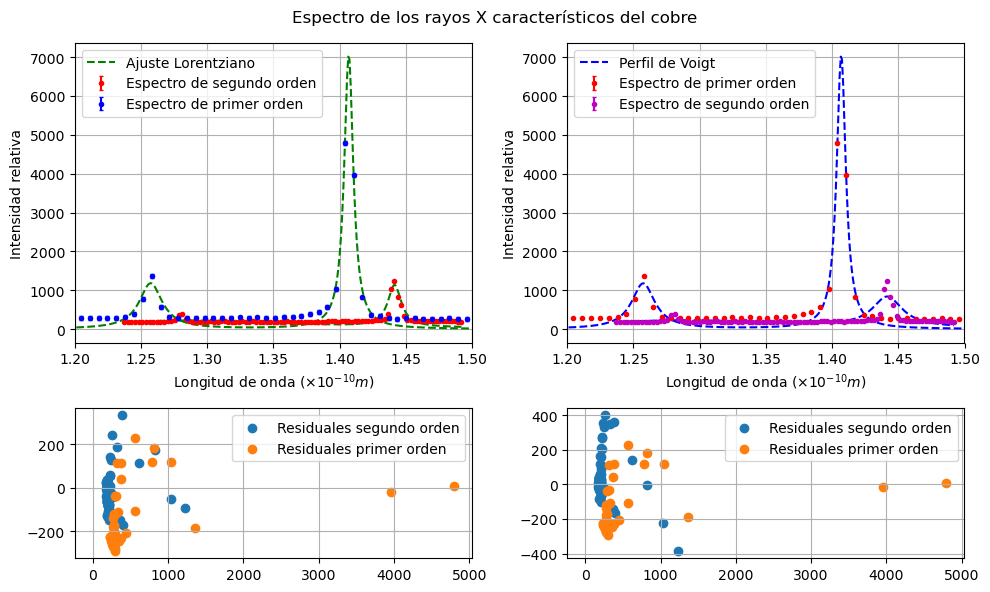

In [514]:
#Gráfico
fig, axis = plt.subplots(2,2, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0, 0]
ax2 = axis[0, 1]
ax3 = axis[1, 0]
ax4 = axis[1, 1]

fig.suptitle('Espectro de los rayos X característicos del cobre')

ax1.errorbar(x2,y2,color='r',label=r'Espectro de segundo orden',fmt='.',capsize=1.5,yerr=np.sqrt(errora2[0]+errorb2[0]))
ax1.plot(x1_2,Lorentzian(x1_2,hb2,x0b2,Wb2)+Lorentzian(x1_2,ha2,x0a2,Wa2),'--',color='g', label=r'Ajuste Lorentziano')
ax1.errorbar(x,y,color='b',label=r'Espectro de primer orden',fmt='.',capsize=1.5,yerr=np.sqrt(errora[0]+erroraa[0]+errorb[0]))
ax1.plot(x1_,Lorentzian(x1_,hb,x0b,Wb)+Lorentzian(x1_,ha,x0a,Wa),'--',color='g')
ax1.set_xlim(1.2,1.5)
ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad relativa')
ax1.grid()
ax1.legend()


ax2.errorbar(x,y,color='r',label=r'Espectro de primer orden',fmt='.',capsize=1.5,yerr=np.sqrt(errorva[0]+errorvaa[0]+errorvb[0]))
ax2.plot(x1_,Voigt(x1_,amplitude_fitb, center_fitb, sigma_fitb, gamma_fitb)+Voigt(x1_,amplitude_fita, center_fita, sigma_fita, gamma_fita),'--',color='b', label=r'Perfil de Voigt')
ax2.errorbar(x2,y2,color='m',label=r'Espectro de segundo orden',fmt='.',capsize=1.5,yerr=np.sqrt(errorva2[0]+errorvb2[0]))
ax2.plot(x1_2,Voigt(x1_2,amplitude_fitb2, center_fitb2, sigma_fitb2, gamma_fitb2)+Voigt(x1_2,amplitude_fita2, center_fita2, sigma_fita2, gamma_fita2),'--',color='b')
ax2.set_xlim(1.2,1.5)
ax2.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax2.set_ylabel('Intensidad relativa')
ax2.grid()
ax2.legend()

ax3.scatter(y2,rL2,label = 'Residuales segundo orden')
ax3.scatter(y,rL,label = 'Residuales primer orden')
ax3.plot(x,np.zeros_like(x),color='r')
ax3.grid()
ax3.legend()

ax4.scatter(y2,rV2,label = 'Residuales segundo orden')
ax4.scatter(y,rV,label = 'Residuales primer orden')
ax4.plot(x,np.zeros_like(y),color='r')
ax4.grid()
ax4.legend()

fig.tight_layout()
#plt.savefig('Actividad 1')

**Actividad 2: Absorción de rayos x como función del espesor del material.**

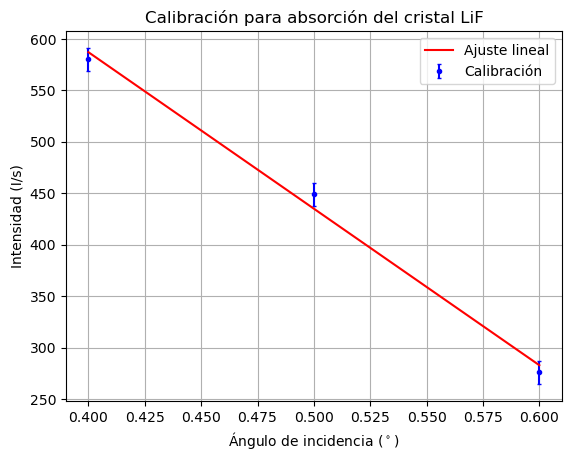

-1520.0000000000002

In [515]:
x_3 = []
for i in range(0,9):
    x_3.append(round(2*dZn*(np.sin(np.radians(Data1A2['Ang'][i]))),1))
#Calibración de barrido sin material
n = 1
param1 = np.polyfit(x_3[0:3], Data1A2['In'][0:3], n)
x_ = np.linspace(min(x_3[0:3]),max(x_3[0:3]),10)
ym1 = param1[0]*x_+param1[1]

#Obtener medidas de incertidumbre

def GetR2(x,y):
    matrix = np.corrcoef(x, y)
    R2 = (matrix[0,1])**2
    return R2

std = np.std(Data1A2['In'][0:3])
var = np.var(Data1A2['In'][0:3])

#Residuales 
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

plt.errorbar(x_3[0:3], Data1A2['In'][0:3],yerr=np.sqrt(std),capsize=1.5,color='b',fmt='.', label='Calibración')
plt.plot(x_,ym1,color='r',label='Ajuste lineal')
plt.title('Calibración para absorción del cristal LiF')
plt.ylabel('Intensidad (I/s)')
plt.xlabel(r'Ángulo de incidencia $(^\circ)$')
# plt.text(6.25, 400, 'y={}x + {}'.format(round(param1[0],2),round(param1[1],2)),color='r')
# plt.text(6.30,385,'R^2= {}'.format(round(GetR2(x_3[0:3], Data1A2['In'][0:3]),2)),color='b')
plt.legend()
plt.grid()
plt.show()
param1[0]

In [516]:
#Graficar el logaritmo de I normalizada con la calibración contra espesor de material (se itera sobre cada longitud de onda)
x_2 = [] #Longitud de onda
ya = [] #Intensidad normalizada para Al
yz = [] #Intensidad normalizada para Zn
IA = [Data2A2['In']*(1/1520),Data3A2['In']*(1/1520),Data4A2['In']*(1/1520),Data5A2['In']*(1/1520)] #Intensidad normalizada
IZ = [Data6A2['In']*(1/1520),Data7A2['In']*(1/1520),Data8A2['In']*(1/1520),Data9A2['In']*(1/1520)] #Intensidad normalizada
gA = [0.02,0.04,0.06,0.08]
gZ = [0.025,0.05,0.075,0.1]

for i in range(0,9):
    x_2.append(round(2*dZn*(np.sin(np.radians(Data2A2['Ang'][i]))),1))
    a = []
    b = []
    for j in range(0,4):
        a.append(IA[j][i])
        b.append(IZ[j][i])
    ya.append(a)
    yz.append(b)

#Regresion lineal para encontrar mu (dado que se cambiaron los ejes a logaritmo)
mu_a = []
mu_z = []
error_a = []
error_z = []
n = 1
for i in range(0,9):
    param1 = np.polyfit(gA, ya[i], n)
    param11 = np.polyfit(gZ, yz[i], n)
    mu_a.append(np.abs(param1[0]))
    mu_z.append(np.abs(param11[0]))
#Incertidumbre de los parámetros
    error_a.append(np.sqrt(np.std(ya[i])))
    error_z.append(np.sqrt(np.std(yz[i])))

print('Los coeficientes de mu encontrados para la placa de Al fueron: {}'.format(mu_a))
print('Los coeficientes de mu encontrados para la placa de Zn fueron: {}'.format(mu_z))
print('Los valores de incertidumbre de los coeficientes de mu encontrados para la placa de Al fueron: {}'.format(error_a))
print('Los valores de incertidumbre de los coeficientes de mu encontrados para la placa de Zn fueron: {}'.format(error_z))

# #Grafico
# fig = plt.figure(figsize = (12, 5))
# fig.suptitle(r'Coeficiente $\mu$ de absorción dependiente de la intensidad')
# axa = fig.add_subplot(121)
# axz = fig.add_subplot(122)

# axa.set_title('Placa de Aluminio')
# axa.plot(gA,ya[0],label=r'$\lambda=$ {}'.format(x[0]))
# axa.plot(gA,ya[1],label=r'$\lambda=$ {}'.format(x[1]))
# axa.plot(gA,ya[2],label=r'$\lambda=$ {}'.format(x[2]))
# axa.plot(gA,ya[3],label=r'$\lambda=$ {}'.format(x[3]))
# axa.plot(gA,ya[4],label=r'$\lambda=$ {}'.format(x[4]))
# axa.plot(gA,ya[5],label=r'$\lambda=$ {}'.format(x[5]))
# axa.plot(gA,ya[6],label=r'$\lambda=$ {}'.format(x[6]))
# axa.plot(gA,ya[7],label=r'$\lambda=$ {}'.format(x[7]))
# axa.plot(gA,ya[8],label=r'$\lambda=$ {}'.format(x[8]))
# # axa.plot(xI,FitI[0],'--',color='g',label='Ajuste de intensidad')
# axa.set_xlabel(r"Grosor de la placa $(mm)$")
# axa.set_ylabel('Intensidad (I/s)')
# axa.set_yscale('log')
# axa.grid()
# axa.legend()

# axz.set_title('Placa de Zinc')
# axz.plot(gZ,yz[0],label=r'$\lambda=$ {}'.format(x[0]))
# axz.plot(gZ,yz[1],label=r'$\lambda=$ {}'.format(x[1]))
# axz.plot(gZ,yz[2],label=r'$\lambda=$ {}'.format(x[2]))
# axz.plot(gZ,yz[3],label=r'$\lambda=$ {}'.format(x[3]))
# axz.plot(gZ,yz[4],label=r'$\lambda=$ {}'.format(x[4]))
# axz.plot(gZ,yz[5],label=r'$\lambda=$ {}'.format(x[5]))
# axz.plot(gZ,yz[6],label=r'$\lambda=$ {}'.format(x[6]))
# axz.plot(gZ,yz[7],label=r'$\lambda=$ {}'.format(x[7]))
# axz.plot(gZ,yz[8],label=r'$\lambda=$ {}'.format(x[8]))
# # axz.plot(xI,FitI[7]*1.5,'--',color='g',label='Ajuste de intensidad')
# axz.set_xlabel(r"Grosor de la placa $(mm)$")
# axz.set_ylabel('Intensidad (I/s)')
# axz.set_yscale('log')
# axz.grid()
# axz.legend()

Los coeficientes de mu encontrados para la placa de Al fueron: [1.871710526315789, 1.5032894736842113, 0.8157894736842098, 0.4374999999999998, 0.3749999999999995, 0.29605263157894735, 0.3223684210526313, 0.29605263157894735, 0.28618421052631576]
Los coeficientes de mu encontrados para la placa de Zn fueron: [1.7499999999999993, 1.2710526315789468, 0.7157894736842102, 0.44736842105263136, 0.40263157894736823, 0.38684210526315777, 0.3868421052631578, 0.3815789473684209, 0.3789473684210525]
Los valores de incertidumbre de los coeficientes de mu encontrados para la placa de Al fueron: [0.20605674972663762, 0.18440581874077563, 0.13595082696502392, 0.0996899018932578, 0.09335712873962942, 0.08181129994772593, 0.08652580493071751, 0.08181129994772593, 0.08063766710115508]
Los valores de incertidumbre de los coeficientes de mu encontrados para la placa de Zn fueron: [0.22570802843481017, 0.19293276309996213, 0.14392094637166158, 0.11345065454832476, 0.10781571901093617, 0.10508000865411109, 0

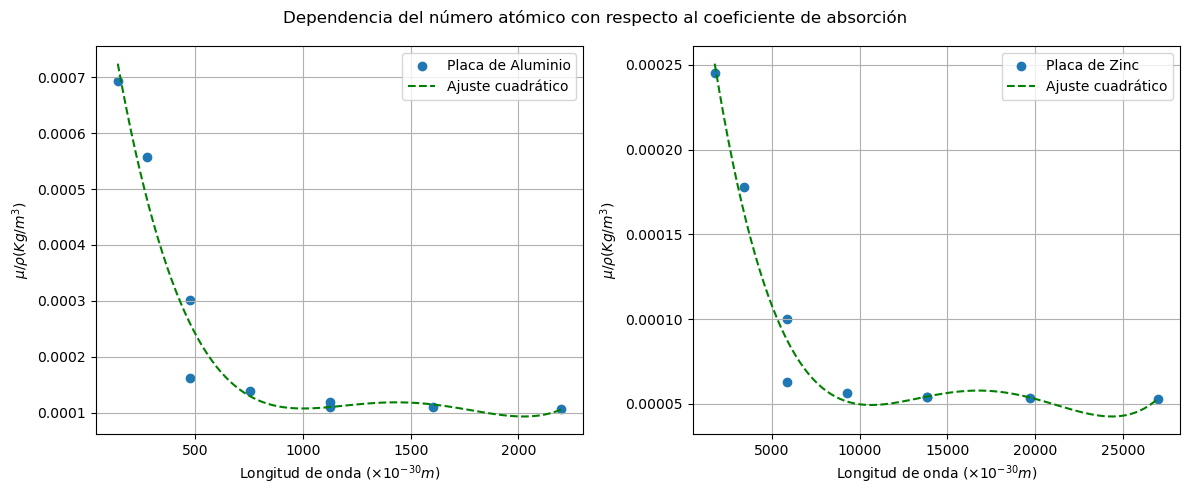

In [521]:
#Densidades de los elementos kg/m3
rho_A = 2699 
rho_Zinc = 7138
#Numero atómico
Za = 13 
Zz = 30
#Parámetros
l3 = []
l33 = []
ra =[]
rz=[]

for i in x_2:
    l3.append(((i*Za)**3))

for i in x_2:
    l33.append(((i*Zz)**3))

for j in mu_a:
    ra.append(j/(rho_A))

for j in mu_z:
    rz.append(j/(rho_Zinc))

#Regresión cuadrática
parama = np.polyfit(l3,ra, 4)
paramz = np.polyfit(l33,rz, 4)

x_ = np.linspace(min(l3),max(l3),100)
x_z = np.linspace(min(l33),max(l33),100)

yma = parama[0]*x_*x_*x_*x_ + x_*x_*x_*parama[1] + x_*x_*parama[2] + x_*parama[3] + parama[4]
ymz = paramz[0]*x_z*x_z*x_z*x_z + x_z*x_z*x_z*paramz[1] + x_z*x_z*paramz[2] + x_z*paramz[3] + paramz[4]

#Grafico
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Dependencia del número atómico con respecto al coeficiente de absorción')
axa = fig.add_subplot(121)
axz = fig.add_subplot(122)

axa.scatter(l3,ra,label='Placa de Aluminio')
axa.plot(x_,yma,'--',label='Ajuste cuadrático',color='g')
axa.set_xlabel(r"Longitud de onda $(\times 10^{-30}m)$")
axa.set_ylabel(r"$\mu/\rho (Kg/m^3)$")


axz.scatter(l33,rz,label='Placa de Zinc')
axz.plot(x_z,ymz,'--',label='Ajuste cuadrático',color='g')
axz.set_xlabel(r"Longitud de onda $(\times 10^{-30}m)$")
axz.set_ylabel(r"$\mu/\rho (Kg/m^3)$")

axa.grid()
axa.legend()
axz.grid()
axz.legend()

fig.tight_layout()

**Actividad 3:Dependencia de la intensidad del voltaje y corriente del ánodo.**

In [525]:
#Datos organizados por la variable constante
Icon = [Data1A3['11kV'],Data1A3['13kV'],Data1A3['15kV'],Data1A3['17kV'],Data1A3['19kV'],Data1A3['21kV'],Data1A3['23kV'],Data1A3['25kV'],Data1A3['27kV'],Data1A3['29kV'],Data1A3['31kV'],Data1A3['33kV'],Data1A3['35kV']]
Vcon = [Data2A3['0.1mA'],Data2A3['0.2mA'],Data2A3['0.3mA'],Data2A3['0.4mA'],Data2A3['0.5mA'],Data2A3['0.6mA'],Data2A3['0.7mA'],Data2A3['0.8mA'],Data2A3['0.9mA'],Data2A3['1mA']]

xI = [] #Longitudes de onda para corriente constante
bI = []
covI = []
uaI = np.arange(11,35,2) #Valores de voltaje 

xV = [] #Longitudes de onda para voltaje constante
bV = []
covV = []
IA = np.arange(0.1,1,0.1) #Valores de corriente


#Hallar longitudes de onda para cada ángulo, no es necesario dividir por ningún orden ya que los ángulos de incidencia trabajados están dentro del rango de n=1
for i in range(0,len(Data2A3['Ang'])):
    xI.append(2*dZn*(np.sin(np.radians(Data1A3['Ang'][i]-2.0))))

for i in range(0,len(Data2A3['Ang'])):
    xV.append(2*dZn*(np.sin(np.radians(Data2A3['Ang'][i]-2.0))))


#Ajuste de cada tipo para la grafica con corriente constante: Corriente del ánodo 1mA y voltaje constante 35kV
def UI(I,b):
    return I*(1/b)

def UV(I,b):
    return I*(1/(b*(35-9.979)**(3/2)))

for i in range(0,len(uaI)+1):
    popt, pcov = curve_fit(UI,xdata=xI, ydata=Icon[i])
    b = popt[0]*1e2
    bI.append(b)
    covI.append(np.sqrt(np.diag(pcov)))

for i in range(0,len(IA)+1):
    popt, pcov = curve_fit(UV,xdata=xV, ydata=Vcon[i])
    b = popt[0]*1e2
    bV.append(round(b,5))
    covV.append(np.sqrt(np.diag(pcov)))

print("Los valores de la constante 1/b manteniendo corriente constante halladas fueron: {}".format(bI))
print("Los valores de error en el cálculo de cada constante b fueron: {}".format(covI))

print("Los valores de la constante 1/b manteniendo voltaje constante halladas fueron: {}".format(bV))
print("Los valores de error en el cálculo de cada constante b fueron: {}".format(covV))

print(np.mean(covV))
print(np.mean(covI))
print(np.mean(bV))
print(np.mean(bI))


Los valores de la constante 1/b manteniendo corriente constante halladas fueron: [8.25449189843359, 2.059165811493141, 1.0797555903148237, 0.7256980712686015, 0.5306436101186935, 0.4231250254236266, 0.3551414254012014, 0.31107866961795433, 0.27377224041086057, 0.24497975722635434, 0.20499286701891006, 0.26642561172306295, 0.2512382790808404]
Los valores de error en el cálculo de cada constante b fueron: [array([0.01671942]), array([0.00620202]), array([0.00349353]), array([0.00226895]), array([0.00160544]), array([0.00124106]), array([0.00101759]), array([0.00088307]), array([0.00077069]), array([0.00067757]), array([0.00053844]), array([0.00057863]), array([0.00055598])]
Los valores de la constante 1/b manteniendo voltaje constante halladas fueron: [0.01446, 0.00699, 0.00469, 0.00342, 0.00278, 0.00236, 0.00205, 0.00181, 0.00162, 0.00144]
Los valores de error en el cálculo de cada constante b fueron: [array([3.7912158e-05]), array([1.79864938e-05]), array([1.15791401e-05]), array([8.11

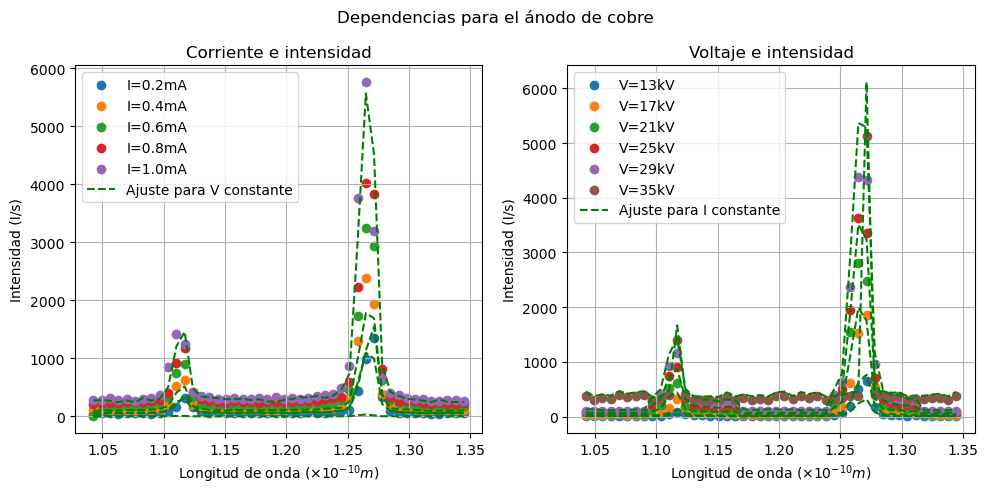

In [526]:
#Grafico
fig = plt.figure(figsize = (10, 5))
fig.suptitle('Dependencias para el ánodo de cobre')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Dependencia de corriente

ax1.scatter(xV,Vcon[1],label='I=0.2mA')
ax1.plot(xV,Vcon[1]/(bV[1]*(35-9.979)**(3/2)),'--',color='g')

ax1.scatter(xV,Vcon[3],label='I=0.4mA')
ax1.plot(xV,Vcon[3]/(bV[3]*(35-9.979)**(3/2)),'--',color='g')

ax1.scatter(xV,Vcon[5],label='I=0.6mA')
ax1.plot(xV,Vcon[5]/(bV[5]*10*(35-9.979)**(3/2)),'--',color='g')

ax1.scatter(xV,Vcon[7],label='I=0.8mA')
ax1.plot(xV,Vcon[7]/(bV[7]*(10)*(35-9.979)**(3/2)),'--',color='g')

ax1.scatter(xV,Vcon[9],label='I=1.0mA')
ax1.plot(xV,Vcon[9]/(bV[9]*(1e3)*(35-9.979)**(3/2)),'--',color='g',label='Ajuste para V constante')

ax1.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax1.set_ylabel('Intensidad (I/s)')
ax1.set_title('Corriente e intensidad')
ax1.grid()
ax1.legend()

#Dependencia de voltaje

ax2.scatter(xV,Icon[1],label='V=13kV')
ax2.plot(xV,Icon[1]*(1/bI[1]),'--',color='g')

ax2.scatter(xV,Icon[3],label='V=17kV')
ax2.plot(xV,Icon[3]*(1/bI[3]*0.3),'--',color='g')

ax2.scatter(xV,Icon[5],label='V=21kV')
ax2.plot(xV,Icon[5]*(1/bI[5]*0.3),'--',color='g')

ax2.scatter(xV,Icon[7],label='V=25kV')
ax2.plot(xV,Icon[7]*(1/bI[7]*0.3),'--',color='g')

ax2.scatter(xV,Icon[9],label='V=29kV')
ax2.plot(xV,Icon[9]*(1/bI[9]*0.3),'--',color='g')

ax2.scatter(xV,Icon[12],label='V=35kV')
ax2.plot(xV,Icon[12]*(1/bI[12]*0.3),'--',color='g',label='Ajuste para I constante')


ax2.set_xlabel(r"Longitud de onda $(\times 10^{-10}m)$")
ax2.set_ylabel('Intensidad (I/s)')
ax2.set_title('Voltaje e intensidad')
ax2.grid()
ax2.legend()

fig.tight_layout()

**Actividad 4:Ley de Duane-Hunt.**

In [ ]:
#Para regresiones lineales o polinómicas de cualquier orden
# n = 1
# param = np.polyfit(x, y, n)

# _x = np.linspace(0,10,2)

# param = GetFit(x,y)
# ym = GetModel(_x,param_az)

In [ ]:
#Obtener medidas de incertidumbre

# def GetR2(x,y):
#     matrix = np.corrcoef(x, y)
#     R2 = (matrix[0,1])**2
#     return R2

#Desviacion estandar
#std = np.std(x,axis=0)
#Varianza
#var = np.var(x,axis=0)

#Residuales 
# def Residuals(y,ym_az):
#     e = []
#     for i in range(0,len(y)):
#         e.append(y[i]-ym[i])
#     return e

In [ ]:
#Graficas
# plt.errorbar(x, y,xerr,capsize=1.5,color='b',fmt='.')
# plt.plot(x,y,color='b')
# plt.title('Gráfica')
# plt.xlabel('C')
# plt.ylabel('V')
# plt.text(6, 7.5, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)),color='b')
# plt.text(6,7.1,'R^2= {}'.format(round(GetR2(x,y),2)),color='b')
# plt.legend()
# plt.show()

In [ ]:
#Grafica de dos o mas plots
# fig = plt.figure(figsize = (10, 5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)


# ax1.plot(xI,yI)
# ax2.plot(xI,yV)

# ax1.grid()
# ax2.grid()

# ax1.legend()
# plt.show()